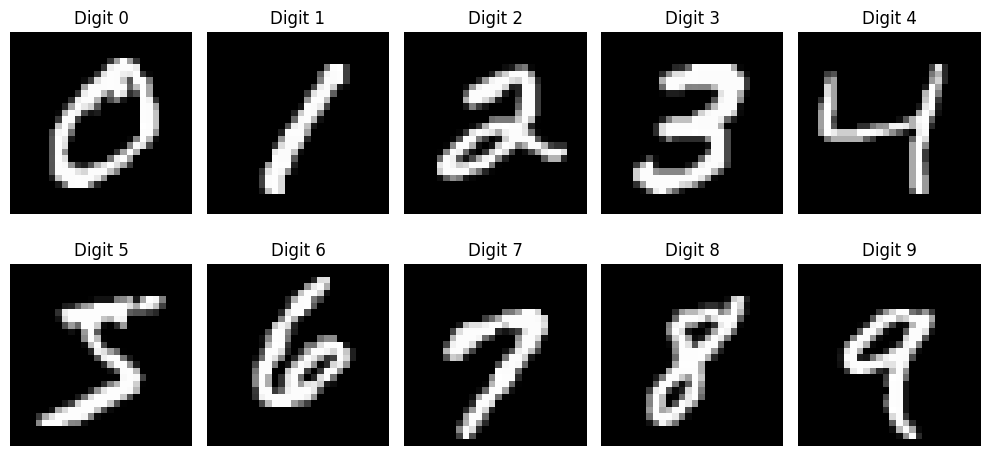

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (_, _) = mnist.load_data()

unique_digits = np.unique(y_train)

plt.figure(figsize=(10, 5))
for i, digit in enumerate(unique_digits):
    idx = np.where(y_train == digit)[0][0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f"Digit {digit}")
    plt.axis('off')

plt.tight_layout()
plt.show()

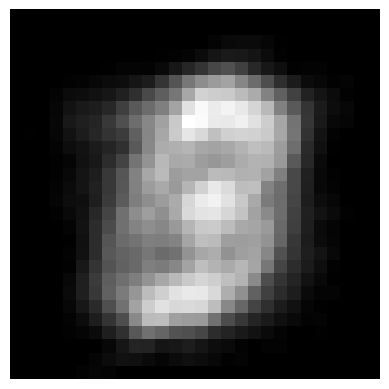

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, _), (_, _) = mnist.load_data()

def overlay_images(images):
    overlayed_image = np.zeros_like(images[0], dtype=float)
    for image in images:
        overlayed_image += image.astype(float) / len(images)
    return overlayed_image

selected_digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
num_images_per_digit = 10

selected_images = []
for digit in selected_digits:
    digit_images = x_train[np.where(_ == digit)[0]][:num_images_per_digit]
    selected_images.extend(digit_images)

overlayed_image = overlay_images(selected_images)
plt.imshow(overlayed_image, cmap='gray')
plt.axis('off')
plt.show()

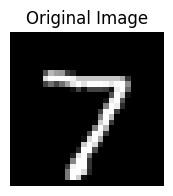

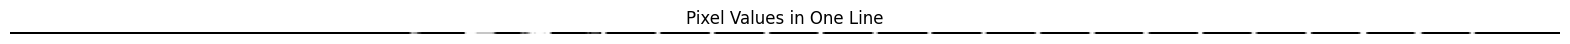

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(_, _), (x_test, _) = mnist.load_data()

image_index = 0
selected_image = x_test[image_index]

plt.figure(figsize=(10, 2))
plt.imshow(selected_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

plt.figure(figsize=(20, 1))
plt.imshow(selected_image.reshape(1, -1), cmap='gray')
plt.title('Pixel Values in One Line')
plt.axis('off')
plt.show()

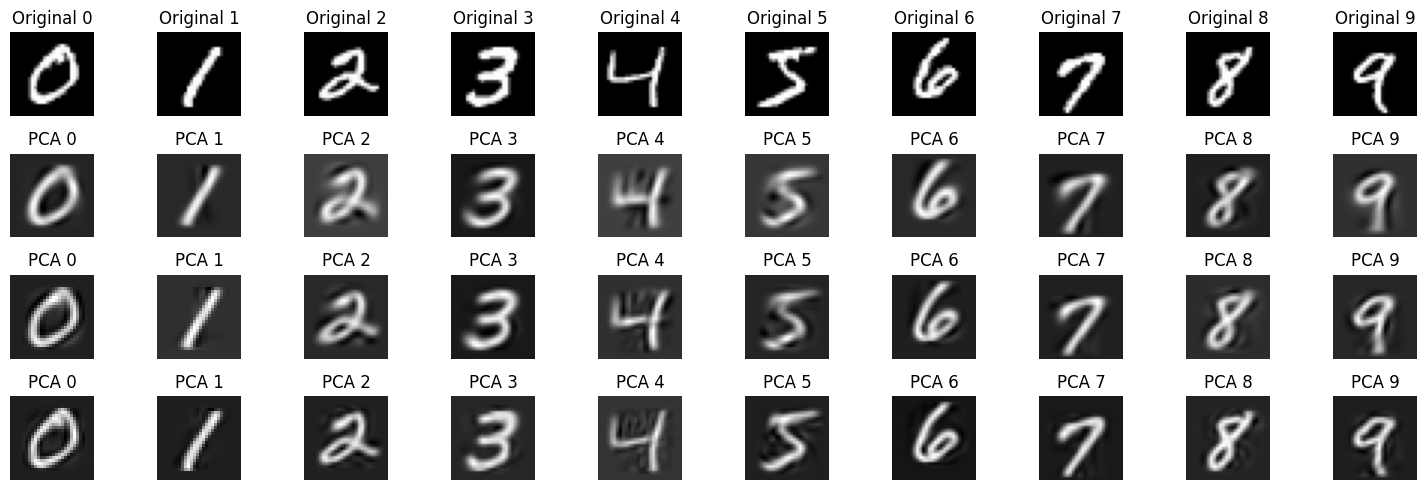

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist

(x_train, y_train), (_, _) = mnist.load_data()

num_samples, height, width = x_train.shape
x_train_flat = x_train.reshape(num_samples, height * width)

selected_digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

plt.figure(figsize=(15, 5))
for i, digit in enumerate(selected_digits):
    digit_images = x_train_flat[y_train == digit]

    plt.subplot(4, len(selected_digits), i + 1)
    plt.imshow(digit_images[0].reshape(height, width), cmap='gray')
    plt.title(f"Original {digit}")
    plt.axis('off')

    pca = PCA(n_components=0.7)
    pca.fit(digit_images)
    transformed_images = pca.inverse_transform(pca.transform(digit_images))

    plt.subplot(4, len(selected_digits), len(selected_digits) + i + 1)
    plt.imshow(transformed_images[0].reshape(height, width), cmap='gray')
    plt.title(f"PCA {digit}")
    plt.axis('off')

    pca = PCA(n_components=0.8)
    pca.fit(digit_images)
    transformed_images = pca.inverse_transform(pca.transform(digit_images))

    plt.subplot(4, len(selected_digits), 2 * len(selected_digits) + i + 1)
    plt.imshow(transformed_images[0].reshape(height, width), cmap='gray')
    plt.title(f"PCA {digit}")
    plt.axis('off')

    pca = PCA(n_components=0.9)
    pca.fit(digit_images)
    transformed_images = pca.inverse_transform(pca.transform(digit_images))

    plt.subplot(4, len(selected_digits), 3 * len(selected_digits) + i + 1)
    plt.imshow(transformed_images[0].reshape(height, width), cmap='gray')
    plt.title(f"PCA {digit}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.patches import Rectangle
from tensorflow.keras.datasets import mnist

(x_train, _), (_, _) = mnist.load_data()

x_train_flat = x_train.reshape(x_train.shape[0], -1)

pca = PCA(n_components=0.9)
pca.fit(x_train_flat)

components = pca.components_.reshape(-1, 28, 28)

print("Top-left 4x4 component:")
print(components[0][:4, :4])
print("\nTop-right 4x4 component:")
print(components[0][:4, -4:])
print("\nBottom-left 4x4 component:")
print(components[0][-4:, :4])
print("\nBottom-right 4x4 component:")
print(components[0][-4:, -4:])

Top-left 4x4 component:
[[ 5.26572512e-20 -5.55111512e-17 -5.55111512e-17  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.96615753e-06  1.09264414e-06]
 [ 0.00000000e+00  0.00000000e+00  2.56757368e-06  7.83497352e-06]]

Top-right 4x4 component:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 8.82496594e-06  3.65876221e-06  0.00000000e+00  0.00000000e+00]
 [ 1.35708909e-05  1.38381967e-06 -3.22083306e-06  0.00000000e+00]]

Bottom-left 4x4 component:
[[ 0.00000000e+00  0.00000000e+00  4.14579037e-06  1.60971199e-05]
 [ 0.00000000e+00  0.00000000e+00  5.25692968e-07 -7.54683342e-06]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -9.89068983e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

Bottom-right 4x4 component:
[[ 2.75321633e-05 -3.81759275e-06 -2.19428242e-06  0.00000000e+00]
 [ 1.71774789e-05 -

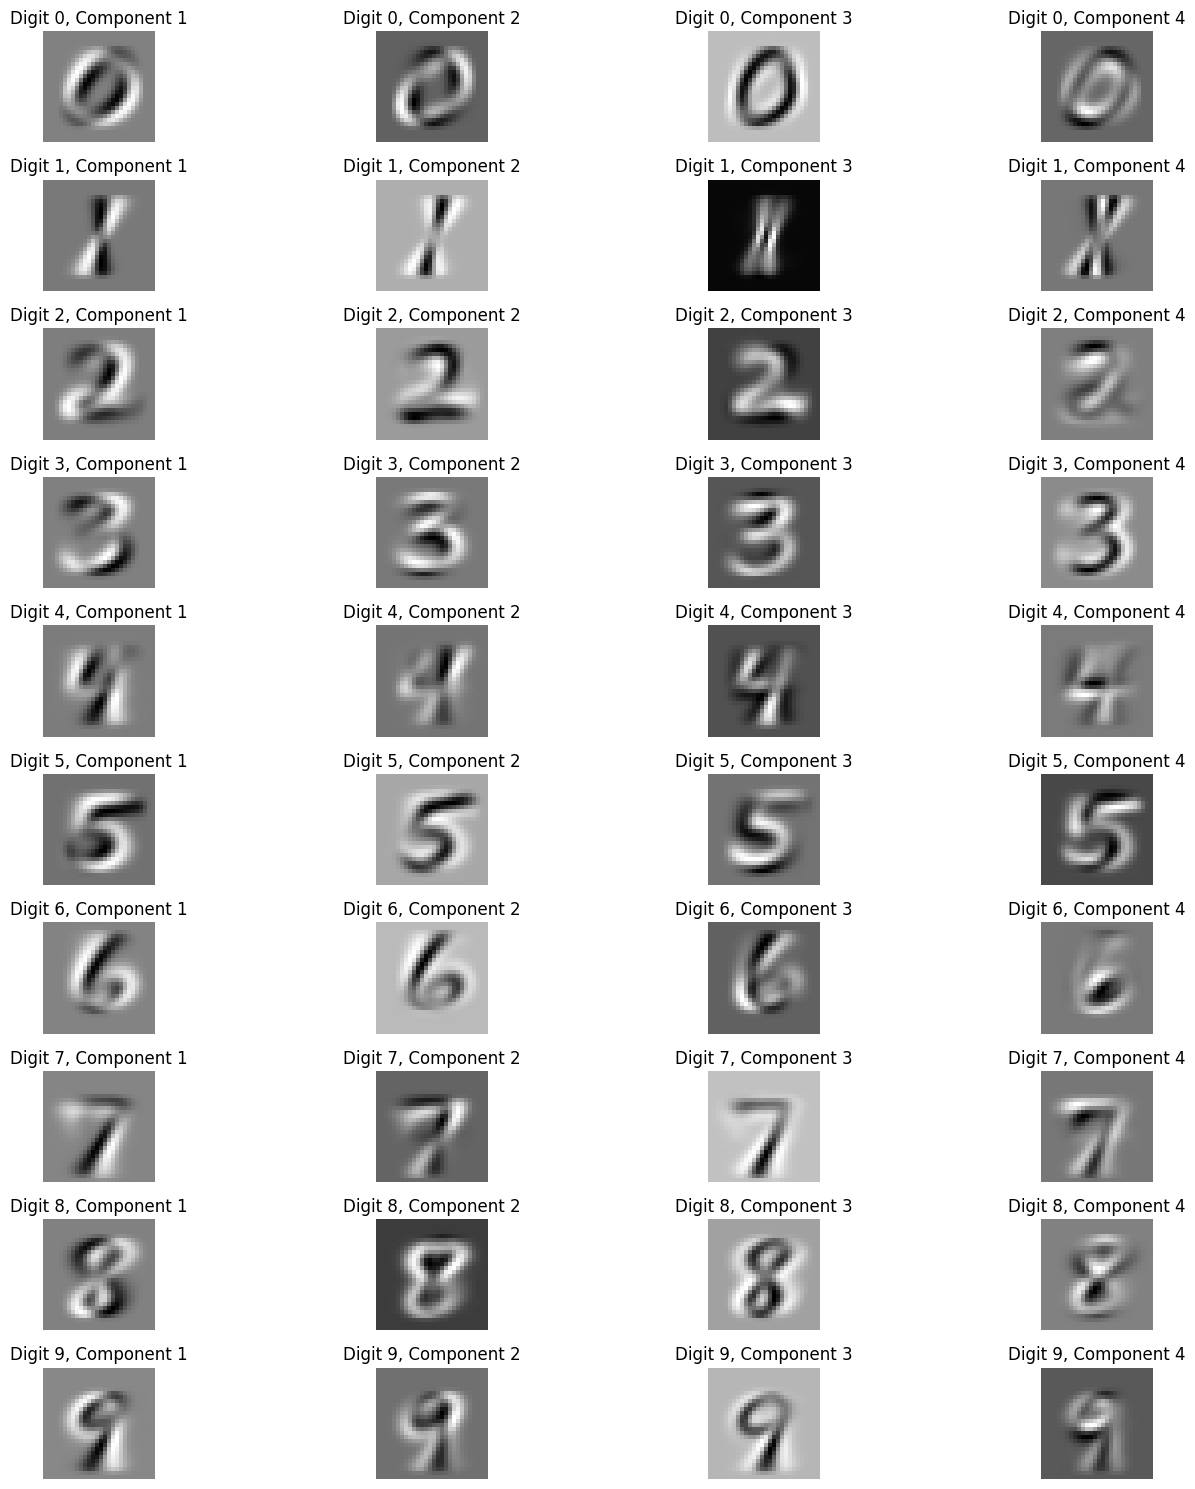

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist

(x_train, y_train), (_, _) = mnist.load_data()

num_samples, height, width = x_train.shape
x_train_flat = x_train.reshape(num_samples, height * width)

selected_digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

plt.figure(figsize=(15, 15))
for i, digit in enumerate(selected_digits):
    digit_images = x_train_flat[y_train == digit]

    pca = PCA(n_components=4)
    pca.fit(digit_images)
    principal_components = pca.components_

    for j in range(4):
        plt.subplot(10, 4, i * 4 + j + 1)
        plt.imshow(principal_components[j].reshape(height, width), cmap='gray')
        plt.title(f"Digit {digit}, Component {j+1}")
        plt.axis('off')

plt.tight_layout()
plt.show()

In [5]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_samples, height, width = x_train.shape
x_train_flat = x_train.reshape(num_samples, height * width)
x_test_flat = x_test.reshape(x_test.shape[0], height * width)
x_train_scaled = x_train_flat.astype('float32') / 255.0
x_test_scaled = x_test_flat.astype('float32') / 255.0

lda = LinearDiscriminantAnalysis()

lda.fit(x_train_scaled, y_train)
lda_pred_orig = lda.predict(x_test_scaled)
accuracy_orig = accuracy_score(y_test, lda_pred_orig)

pca = PCA(n_components=0.8)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

lda.fit(x_train_pca, y_train)
lda_pred_pca = lda.predict(x_test_pca)
accuracy_pca = accuracy_score(y_test, lda_pred_pca)

print("원본 데이터로 LDA 적용한 경우의 정확도:", accuracy_orig)
print("PCA된 데이터로 LDA 적용한 경우의 정확도:", accuracy_pca)

원본 데이터로 LDA 적용한 경우의 정확도: 0.873
PCA된 데이터로 LDA 적용한 경우의 정확도: 0.872


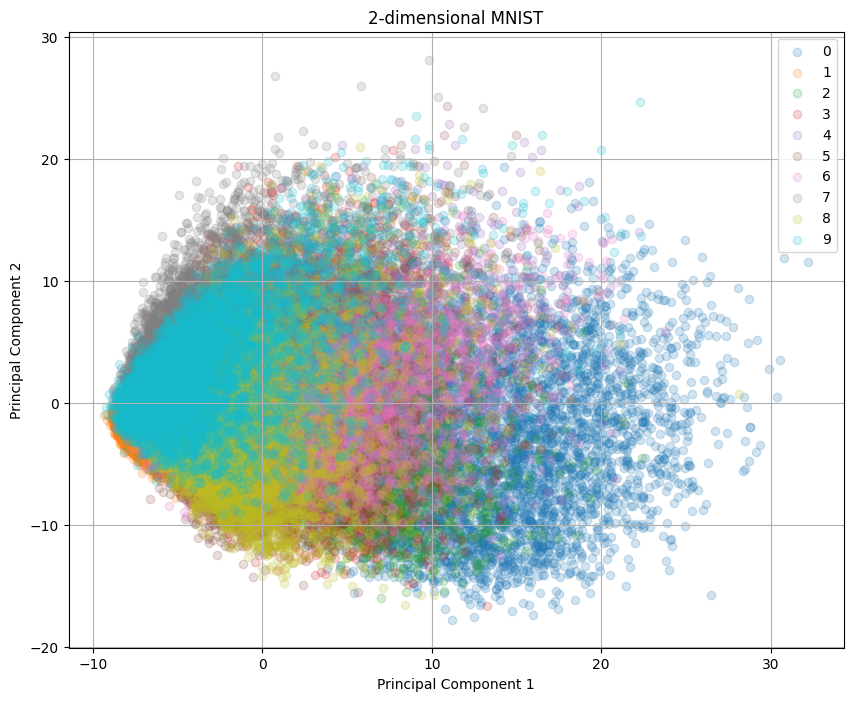

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist

(x_train, y_train), (_, _) = mnist.load_data()

num_samples, height, width = x_train.shape
x_train_flat = x_train.reshape(num_samples, height * width)
x_train_scaled = StandardScaler().fit_transform(x_train_flat.astype('float32'))

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)

plt.figure(figsize=(10, 8))
for digit in range(10):
    plt.scatter(x_train_pca[y_train == digit, 0], x_train_pca[y_train == digit, 1], label=str(digit), alpha=0.2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2-dimensional MNIST')
plt.legend()
plt.grid(True)
plt.show()


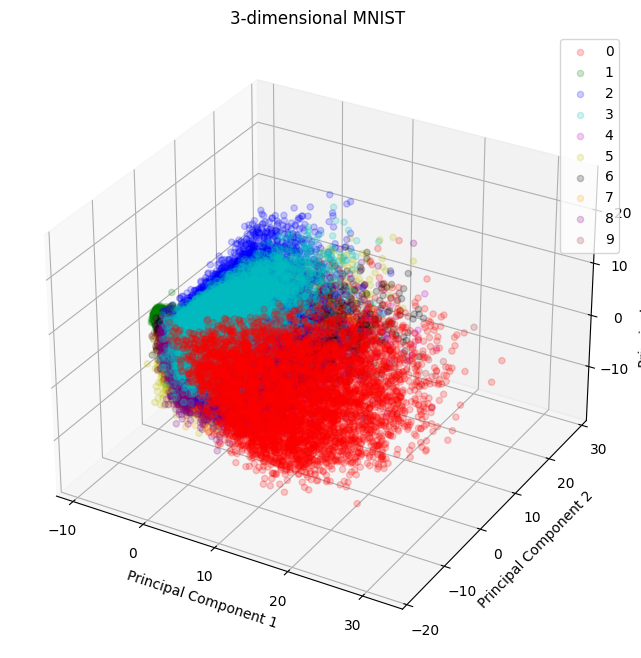

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist

(x_train, y_train), (_, _) = mnist.load_data()

num_samples, height, width = x_train.shape
x_train_flat = x_train.reshape(num_samples, height * width)
x_train_scaled = StandardScaler().fit_transform(x_train_flat.astype('float32'))

pca = PCA(n_components=3)
x_train_pca = pca.fit_transform(x_train_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

for digit in range(10):
    ax.scatter(x_train_pca[y_train == digit, 0],
               x_train_pca[y_train == digit, 1],
               x_train_pca[y_train == digit, 2],
               c=colors[digit], label=str(digit), alpha=0.2)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3-dimensional MNIST')
ax.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


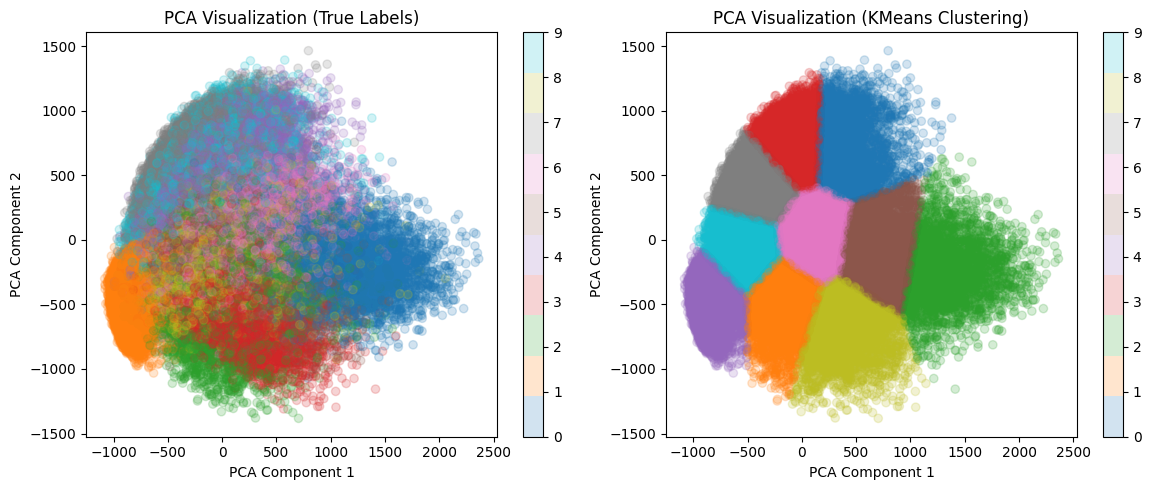

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from tensorflow.keras.datasets import mnist

(x_train, y_train), (_, _) = mnist.load_data()

num_samples, height, width = x_train.shape
x_train_flat = x_train.reshape(num_samples, -1)

pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(x_train_flat)

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(x_pca)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_train, cmap='tab10', alpha=0.2)
plt.title('PCA Visualization (True Labels)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans_labels, cmap='tab10', alpha=0.2)
plt.title('PCA Visualization (KMeans Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


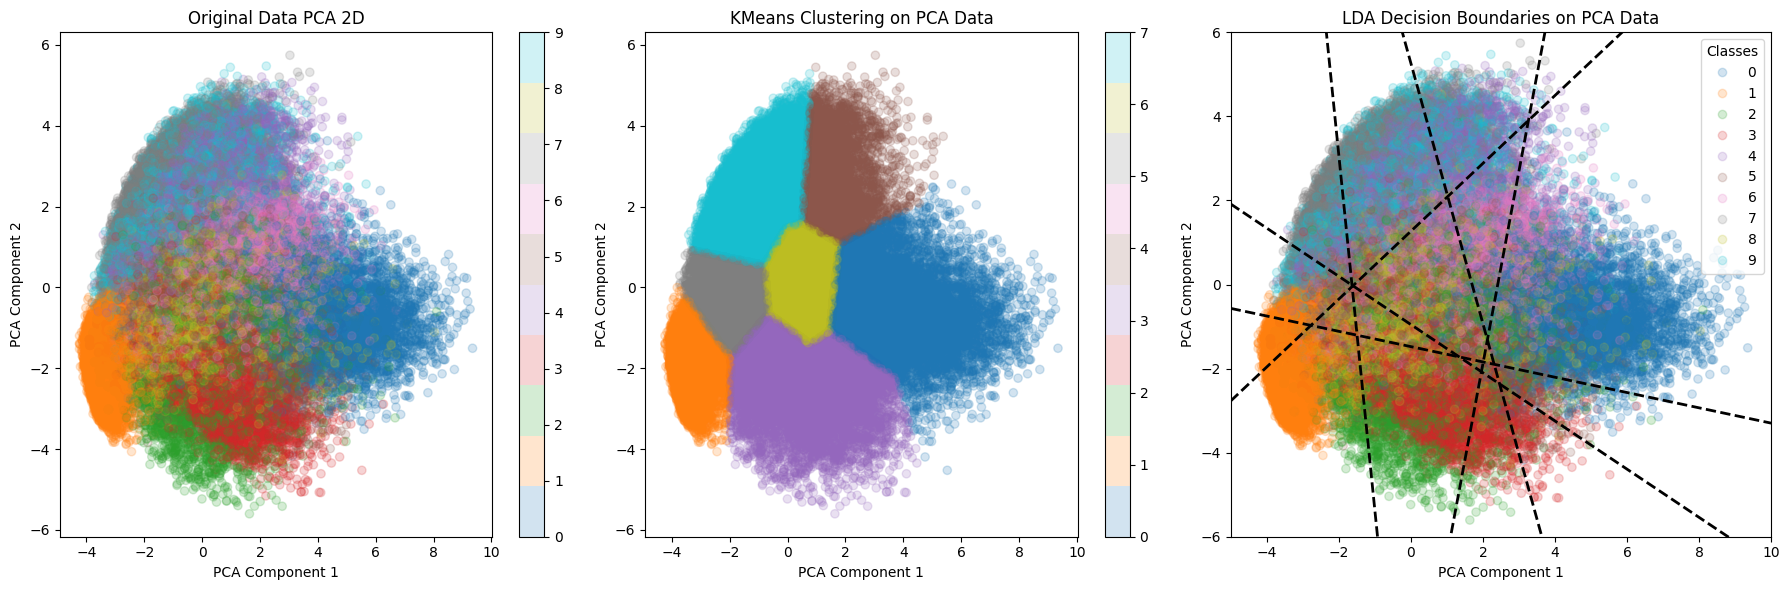

In [14]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import fetch_openml

x_train, y_train = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y_train = y_train.astype(int)

num_samples = x_train.shape[0]
x_train_flat = x_train / 255.0

pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(x_train_flat)

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(x_pca)

from scipy.stats import mode

labels = np.zeros_like(kmeans_labels)
for i in range(10):
    mask = (kmeans_labels == i)
    labels[mask] = mode(y_train[mask])[0]

lda = LDA(n_components=2)
x_lda = lda.fit_transform(x_pca, y_train)

def plot_lda_boundaries(x, y, lda):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    for i in range(10):
        for j in range(i + 1, 10):
            mean_i = lda.means_[i]
            mean_j = lda.means_[j]

            mid_point = (mean_i + mean_j) / 2

            v = mean_j - mean_i
            slope = -v[0] / v[1]
            intercept = mid_point[1] - slope * mid_point[0]

            x_values = np.array(ax.get_xlim())
            y_values = intercept + slope * x_values
            plt.plot(x_values, y_values, 'k--', linewidth=0.5, alpha=0.5)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_train, cmap='tab10', alpha=0.2)
plt.title('Original Data PCA 2D')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap='tab10', alpha=0.2)
plt.title('KMeans Clustering on PCA Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()

plt.subplot(1, 3, 3)
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_train, cmap='tab10', alpha=0.2)
plt.title('LDA Decision Boundaries on PCA Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.xlim([-5, 10])
plt.ylim([-6, 6])

selected_pairs = [(0, 3), (2, 3), (1, 2), (1, 7), (6, 7), (0, 6)]
for i, j in selected_pairs:
    mean_i = lda.means_[i]
    mean_j = lda.means_[j]
    mid_point = (mean_i + mean_j) / 2
    v = mean_j - mean_i
    slope = -v[0] / v[1]
    intercept = mid_point[1] - slope * mid_point[0]
    x_values = np.array(plt.xlim())
    y_values = intercept + slope * x_values
    plt.plot(x_values, y_values, 'k--', linewidth=2)

plt.legend(*scatter.legend_elements(), title="Classes")
plt.tight_layout()
plt.show()